In [1]:
# import packages
import numpy as np
import cv2
import imutils
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from keras.models import load_model
sns.set(style='white', context='notebook', palette='deep')

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.


In [2]:
model = load_model('mnist_keras_cnn_model.h5')

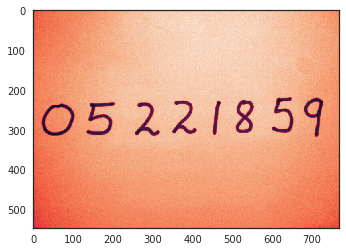

In [3]:
im = cv2.imread('images/digit.jpg')
im_g = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.imshow(im_g)

In [4]:
# add padding
image = cv2.copyMakeBorder(im_g, 0,0,1,1,cv2.BORDER_CONSTANT)

In [5]:
im_gray = cv2.GaussianBlur(image, (5,5), 0)
ret, im_th = cv2.threshold(im_gray, 90, 255, cv2.THRESH_BINARY_INV)

In [6]:
# find contours in the image
cnts= cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]

# get rectangles contains each contour
rects = [cv2.boundingRect(ctr) for ctr in cnts]

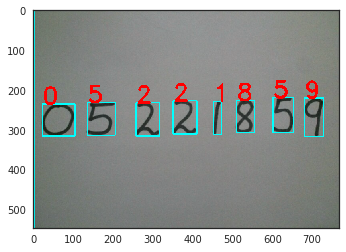

In [7]:
# loop over the countours
for rect in rects:
    # Draw the rectangles
    cv2.rectangle(im, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 255), 2) 
    # Make the rectangular region around the digit
    leng = int(rect[3] * 1.6)
    pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
    pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
    roi = im_th[pt1:pt1+leng, pt2:pt2+leng]
    # Resize the image
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
    roi = cv2.dilate(roi, (3, 3))
    
    # convert to image array
    roi_arr = np.reshape(roi, [1,28,28,1])
    # predict
    c = model.predict(roi_arr)
    op=str(np.nonzero(c[0]))
    cv2.putText(im, op[8:9], (rect[0], rect[1]),cv2.FONT_HERSHEY_DUPLEX, 2, (255, 0, 0), 3)
# then display the output contours
plt.imshow(im)
plt.show()